## PAIR PROGRAMMING EDA III

### Outliers

---


Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. 

Para ello trabajaremos con la librería matplotlib y seaborn.

#### **Hipótesis**

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?
- ¿Cuáles son las edades que más sufren ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo

Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:


- age ✔️ la limpiamos en el pair de Limpieza II
- species ✔️ la limpiamos en el pair de Limpieza II
- country ✔️ la limpiamos en el pair de Limpieza II
- fatal ✔️ la limpiamos en el pair de Pandas V
- year ✔️ es una columna de tipo float deberíamos convertirla a integer
- sex ✔️ la limpiamos en el pair de Pandas V
- fecha ✔️ la limpiamos en el pair de Pandas V

---

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import pickle

pd.options.display.max_columns = None

In [58]:
df= pd.read_pickle("../files/attacks9.pickle")
df.head()

,case_number,year,type,country,activity,age,species_,date,mes_ataque,fatal,sexo,cat_species,edades
0,1800.00.00,1970,Unprovoked,seychelles,a corsair's boat was overturned,NaN,NaN,1800,NaN,Y,F,NaN,NaN
1,1797.05.28.R,1970,Unprovoked,NaN,Dropped overboard,NaN,NaN,Reported May-28-1797,May,Y,NaN,NaN,NaN
2,1792.09.12,1970,Provoked,england,Fishing,NaN,NaN,12-Sep-1792,Sep,Y,M,NaN,NaN
3,1791.00.00,1970,Unprovoked,australia,NaN,NaN,NaN,1791,NaN,Y,F,NaN,NaN
4,1788.05.10,1970,Boat,australia,Fishing,NaN,NaN,10-May-1788,May,N,NaN,NaN,NaN


---

#### **Objetivos**

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:


📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

**EJERCICIO 1**

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [59]:
# tamaño
plt.rcParams["figure.figsize"] = (10,8)

In [60]:
# para evitar warnings el siguiente código
import warnings
warnings.filterwarnings('ignore')

---

**EJERCICIO 2**

Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.



In [61]:
len(df.country.value_counts())

95

In [62]:
df_paises = df.groupby(['country', 'sexo'])['case_number'].count().reset_index()

df_paises

,country,sexo,case_number
0,american samoa,M,2
1,argentina,M,1
2,asia?,M,1
3,australia,F,33
4,australia,M,309
...,...,...,...
107,vanuatu,F,2
108,vanuatu,M,2
109,venezuela,M,4
110,vietnam,F,2


In [63]:
df_paises.sort_values(by='case_number',axis=0, ascending= False, inplace=True)

In [64]:
df_paises10= df_paises.iloc[:11,:]
df_paises10

,country,sexo,case_number
106,usa,M,609
4,australia,M,309
89,south africa,M,224
105,usa,F,132
3,australia,F,33
6,bahamas,M,25
67,new zealand,M,19
12,brazil,M,16
79,reunion,M,15
75,papua new guinea,M,13


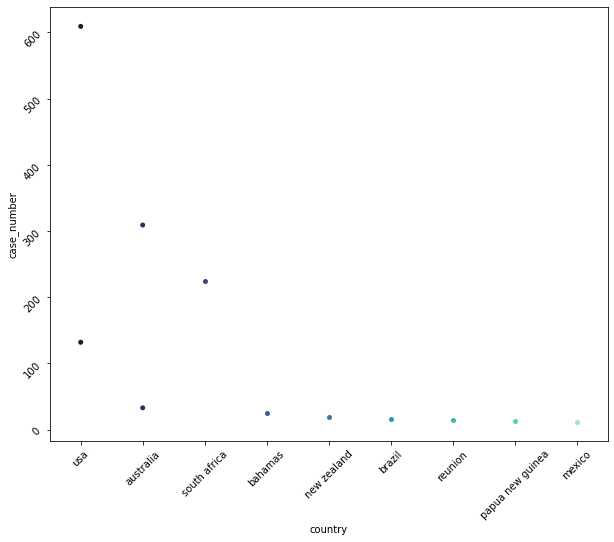

In [65]:

sns.swarmplot('country', 'case_number', data = df_paises10, palette = "mako")   
plt.tick_params(rotation=45)

plt.show(); 

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

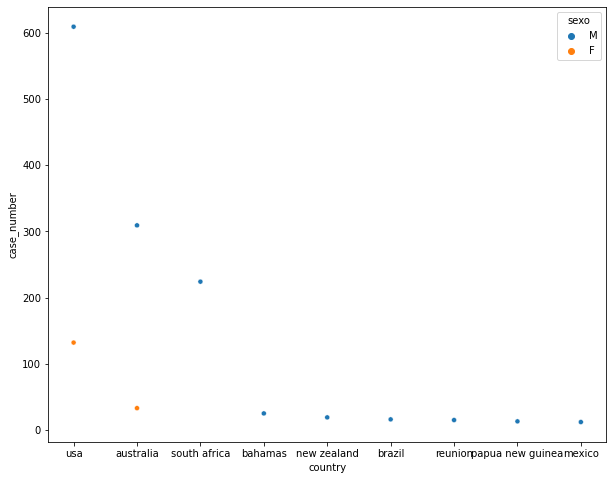

In [66]:
sns.scatterplot('country', 'case_number', data = df_paises10,
                s = 25,    
                hue = 'sexo')  
plt.show(); 

In [67]:
'''
fig = sns.countplot(x='country', data = df_paises10)

# cambiamos el nombre de los ejes
fig.set(xlabel='Isla', ylabel= 'Cuentas' )

# cambiamos el título de la gráfica
fig.set_title('Número de pingüinos por isla')

# motramos la gráfica
plt.show()'''

"\nfig = sns.countplot(x='country', data = df_paises10)\n\n# cambiamos el nombre de los ejes\nfig.set(xlabel='Isla', ylabel= 'Cuentas' )\n\n# cambiamos el título de la gráfica\nfig.set_title('Número de pingüinos por isla')\n\n# motramos la gráfica\nplt.show()"

In [68]:
'''sns.countplot(x = 'country', data = df_paises10 , hue='sexo')
plt.show(); '''

"sns.countplot(x = 'country', data = df_paises10 , hue='sexo')\nplt.show(); "

- ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

- Ataques entre sexos, ¿hay diferencia?

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.